In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
oil_df = pd.read_csv("us_crude_oil.csv")
oil_df = oil_df.iloc[::-1].reset_index(drop=True)
oil_df.head()

,Date,US Production,US Import,US Exports,US Net Import,Inventory,Adjustment,Import from OPEC,Crude Oil and Liquid Fuels Supply,OPEC Production Capacity,Net Inventory Withdrawals,OPEC Production,Value,Nominal
0,1/31/94,6816779.0,5945000,110000,5835290.0,338067000.0,733963.032,2892000,9454972.161,27959177.0,-658883.053,24493494.87,24.80,14.48
1,2/28/94,6770326.0,6313000,116000,6197498.0,335351000.0,77211.714,3237000,9313861.429,27959177.0,2352418.325,24477904.76,25.25,14.79
2,3/31/94,6745622.0,6372000,41000,6331468.0,342345000.0,242361.355,3006000,9380460.548,27959177.0,880568.964,24520851.10,28.80,16.90
3,4/30/94,6612102.0,6955000,120000,6835867.0,339391000.0,302264.000,3728000,9303302.667,27959177.0,-734538.343,24370063.76,31.18,18.31
4,5/31/94,6688193.0,7198000,118000,7080258.0,331544000.0,259904.258,3771000,9339128.968,27959177.0,-2706335.628,24513404.04,32.89,19.37


In [3]:
X = oil_df[['US Production', 'US Import', 'US Exports', 'US Net Import',
       'Inventory', 'Adjustment', 'Import from OPEC',
       'Crude Oil and Liquid Fuels Supply', 'OPEC Production Capacity',
       'Net Inventory Withdrawals', 'OPEC Production']]
y = oil_df["Value"].values.reshape(-1, 1)
print(X.shape, y.shape)

(299, 11) (299, 1)


In [4]:
X_train = X[:200]
y_train = y[:200]
X_test = X[200:]
y_test = y[200:]

#scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
#X_train_scaled = scaler.fit_transform(X_train)
#y_train_scaled = scaler.fit_transform(y_train)
#X_test_scaled = scaler.fit_transform(X_test)
#y_test_scaled = scaler.fit_transform(y_test)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [6]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: -0.337


In [7]:
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 942.6900439393938, R2: -0.3367088287624904


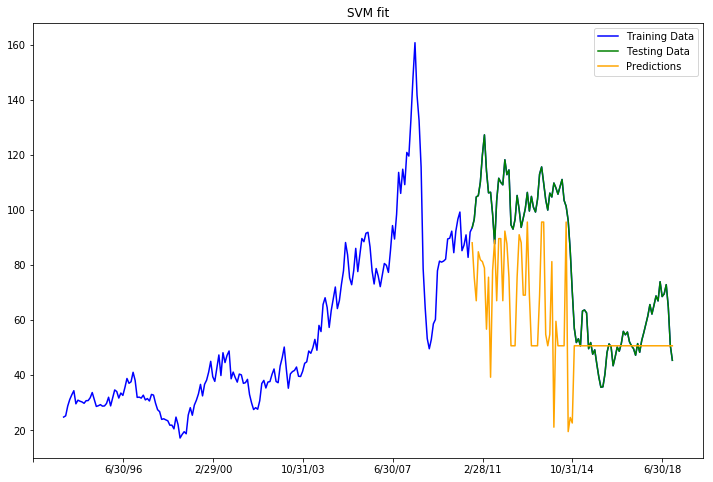

In [9]:
plt.figure(figsize=(12,8))
plt.plot(oil_df["Date"],oil_df["Value"],c="b",label="Training Data")
plt.plot(oil_df["Date"][200:],y_test,c="g", label="Testing Data")
plt.plot(oil_df["Date"][200:],predictions,c="orange",label="Predictions")
plt.legend()
plt.xticks(np.arange(-14.9, 312.9,step=44))
plt.title("SVM fit")
plt.savefig("svm_fit.png")